In [1]:
%pip install pymoo --quiet

In [2]:
import numpy as np
import random
from pymoo.core.problem import Problem
from pymoo.problems import get_problem
from pymoo.util.plotting import plot
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.visualization.scatter import Scatter

from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize


In [8]:
class TSPProblem(Problem):
    def __init__(self, n_cities, seed=50):
        # Define the number of variables (cities) and objectives (time and distance)
        super().__init__(n_var=n_cities, n_obj=2, n_constr=0, xl=0, xu=1)
        
        # Initialize the random seed for reproducibility
        if seed is not None:
            np.random.seed(seed)
        
        # Generate random distances and times between cities
        self.distances = np.random.uniform(0, 100, size=(n_cities, n_cities))
        self.distances = (self.distances + self.distances.T) / 2
        self.times = np.random.uniform(0, 300, size=(n_cities, n_cities))
        random.seed(None)
        
        # Ensure the diagonal is zero (distance/time from a city to itself is zero)
        np.fill_diagonal(self.distances, 0)
        np.fill_diagonal(self.times, 0)

    def _evaluate(self, x, out, *args, **kwargs):
        # Calculate the total distance and time for each solution in x
        distances = []
        times = []
        
        for route in x:
            perm = np.argsort(route)
            total_distance = 0
            total_time = 0
            
            for i in range(len(perm) - 1):
                total_distance += self.distances[perm[i], perm[i+1]]
                total_time += self.times[perm[i], perm[i+1]]
            
            # Add distance and time from last city back to the first city
            total_distance += self.distances[perm[-1], perm[0]]
            total_time += self.times[perm[-1], perm[0]]
            
            distances.append(total_distance)
            times.append(total_time)
        
        out["F"] = np.column_stack([distances, times])

Comprobación del funcionamiento del algoritmo NSGA2 para las funciones continuas

In [9]:
problem = get_problem("mw14", n_var = 30)
print(problem.n_var)
print(problem.n_obj)
print(problem.xl)
print(problem.xu)


30
3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5
 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5]


In [10]:
algorithm = NSGA2(pop_size=100)
res = minimize(problem,
               algorithm,
               ('n_gen', 100),
               verbose=False)

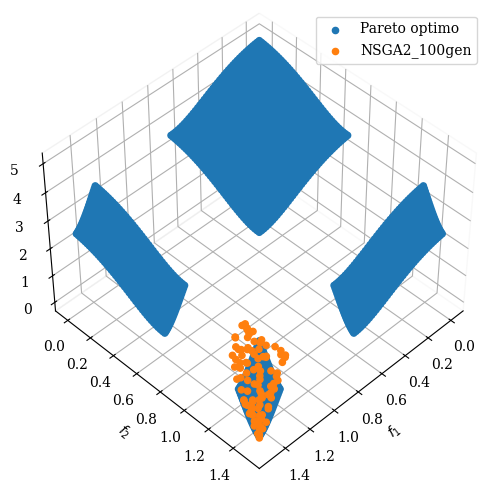

In [11]:
scatter = Scatter()
scatter.add(problem.pareto_front(), label="Pareto optimo")
scatter.add(res.F, label="NSGA2_100gen")
scatter.legend=True
scatter.show()

Comprobación del funcionamiento del algoritmo NSGA2 para el TSPMO

In [12]:
problem = TSPProblem(100)
print(np.shape(problem.distances))
print(np.shape(problem.times))

(100, 100)
(100, 100)


In [13]:
algorithm = NSGA2(pop_size=100)
res = minimize(problem,
               algorithm,
               ('n_gen', 10),
               verbose=False)
res2 = minimize(problem,
               algorithm,
               ('n_gen', 100),
               verbose=False)

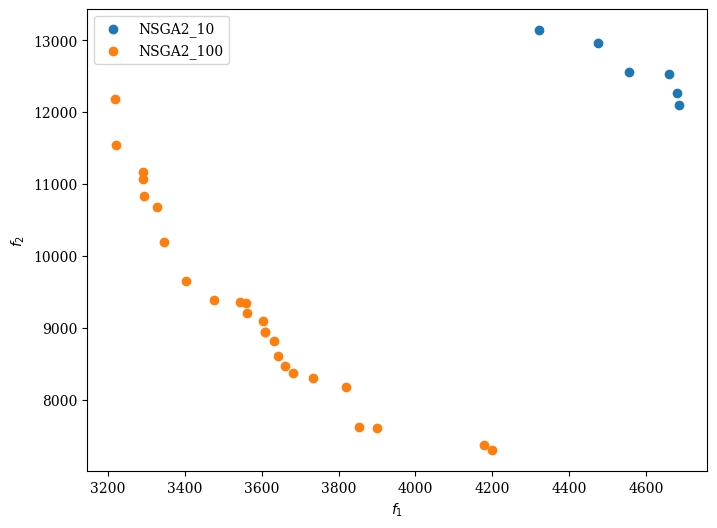

In [14]:
scatter = Scatter()
scatter.add(res.F, label="NSGA2_10")
scatter.add(res2.F, label="NSGA2_100")
scatter.legend=True
scatter.show()
